Ocupando esta data:
https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv
se busca segmentar por cliente con kmeans, hierarchy aggrupation, dbscan y luego comparar los score

# Parte 1
Kmeans

## Importando librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## la data

In [3]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/cust_seg.csv'
data=pd.read_csv(archivo)

In [4]:
data

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


buscando NaN

In [5]:
data.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

se ven NaN

In [6]:
data['Defaulted'].value_counts(dropna=False)

0.0    517
1.0    183
NaN    150
Name: Defaulted, dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [8]:
data1=np.nan_to_num(data)

In [9]:
data1=pd.DataFrame(data1)
data1.drop(0,axis=1,inplace=True)

In [10]:
data1.columns=['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']

In [11]:
data1

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1.0,41.0,2.0,6.0,19.0,0.124,1.073,0.0,6.3
1,2.0,47.0,1.0,26.0,100.0,4.582,8.218,0.0,12.8
2,3.0,33.0,2.0,10.0,57.0,6.111,5.802,1.0,20.9
3,4.0,29.0,2.0,4.0,19.0,0.681,0.516,0.0,6.3
4,5.0,47.0,1.0,31.0,253.0,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846.0,27.0,1.0,5.0,26.0,0.548,1.220,0.0,6.8
846,847.0,28.0,2.0,7.0,34.0,0.359,2.021,0.0,7.0
847,848.0,25.0,4.0,0.0,18.0,2.802,3.210,1.0,33.4
848,849.0,32.0,1.0,12.0,28.0,0.116,0.696,0.0,2.9


## realizando el Kmeans

In [12]:
X=data1.drop(columns=['Years Employed','Card Debt','Other Debt']).values


In [14]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X)

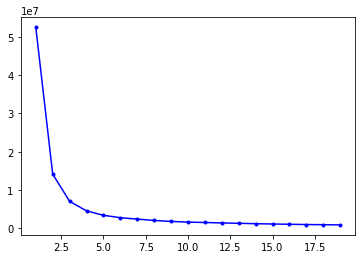

In [15]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')

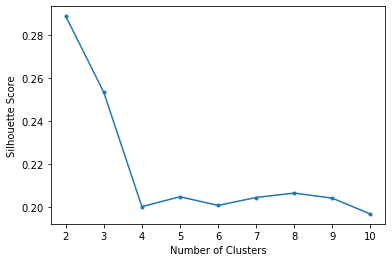

In [16]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [18]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.288660449822204

Con Hierarchy aggrupation

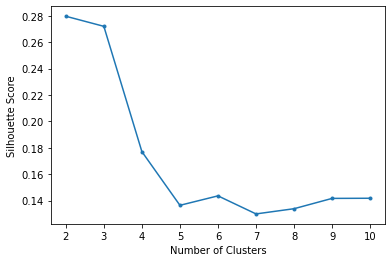

In [19]:
silhouette_scores = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters =i)
  hc.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, hc.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [20]:
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

0.27966974378213627

Con DBSCAN

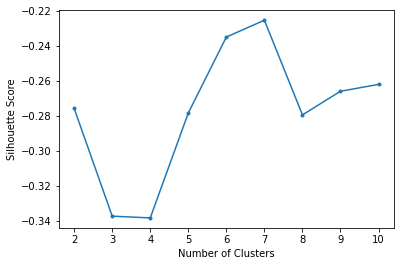

In [22]:
silhouette_scores = []
for i in range(2, 11):
    dbs = DBSCAN(eps = 0.5, min_samples = i)
    dbs.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, dbs.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [23]:
dbs = DBSCAN(eps = 0.5, min_samples = 5)
dbs.fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

-0.2784096780504158